In [1]:
!pip install opencv-python


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
# from skimage.color import rgb2gray

In [3]:
messi = 'Merge_Images\static\images\messi.jpg'
flowers = 'Merge_Images\static\images\phase image.jpg'

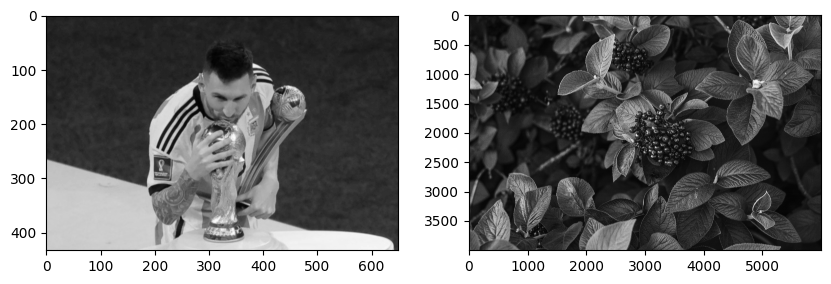

[[ 34  36  38 ...  37  40  40]
 [ 34  36  38 ...  36  38  38]
 [ 35  36  38 ...  35  36  36]
 ...
 [202 202 202 ...  59  59  59]
 [202 202 202 ...  60  64  64]
 [202 202 202 ...  62  63  63]]


In [4]:
messi = cv2.imread(messi, 0)
flower = cv2.imread(flowers, 0)

plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(messi, cmap='gray')
plt.subplot(122)
plt.imshow(flower, cmap='gray')
plt.show()
print(messi)


In [5]:
def get_size_of_images(img):
  
    # get width and height
    width = img.shape[1]
    height = img.shape[0]
    print ("the width is" , width)
    print ("the height is" , height)
    return width , height


In [6]:
def dimension_to_transform(img_1,img_2):
    width1 , height1  = get_size_of_images(img_1)
    width2 , height2  = get_size_of_images(img_2)
    if (width1 > width2):
        width = width2
    else:
        width = width1
    
    if (height1 > height2):
        height = height2
    else:
        height = height1

    return width , height

In [7]:
def Resizing_image(img_1 , img_2):
    width , height = dimension_to_transform(img_1,img_2)
    print(width)
    print(height)
    img_1=cv2.resize(img_1 , (width,height))
    img_2=cv2.resize(img_2 , (width,height))
    return img_1 , img_2


    

In [8]:
messi_resized , flower_resized =Resizing_image(messi,flower)

the width is 650
the height is 433
the width is 6000
the height is 4000
650
433


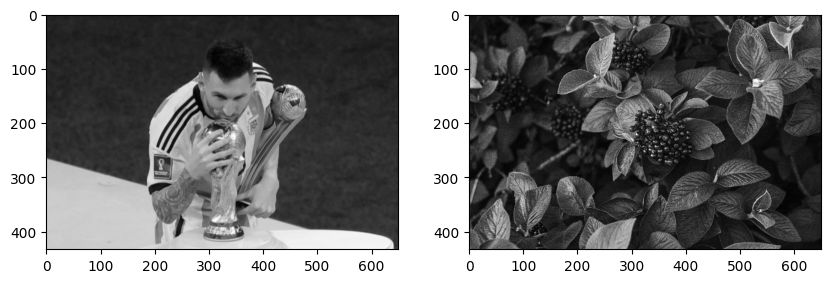

In [9]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(messi_resized, cmap='gray')
plt.subplot(122)
plt.imshow(flower_resized, cmap='gray')
plt.show()

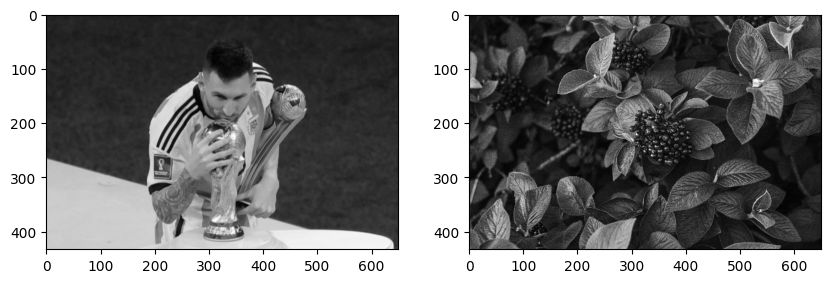

In [10]:

plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(messi_resized, cmap='gray')
plt.subplot(122)
plt.imshow(flower_resized, cmap='gray')
plt.show()

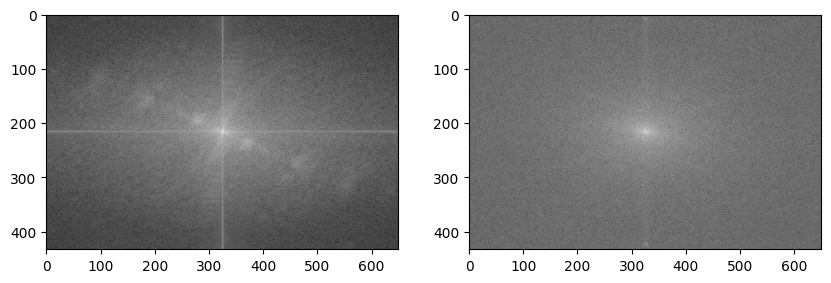

In [11]:
messi_fft = np.fft.fftshift(np.fft.fft2(messi_resized))
flower_fft = np.fft.fftshift(np.fft.fft2(flower_resized))

plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(np.log(np.abs(messi_fft)), cmap='gray')
plt.subplot(122)
plt.imshow(np.log(np.abs(flower_fft)), cmap='gray')
plt.show()

In [12]:
messi_amplitude = np.sqrt(np.real(messi_fft) ** 2 + np.imag(messi_fft) ** 2)
messi_phase = np.arctan2(np.imag(messi_fft), np.real(messi_fft))
flower_amplitude = np.sqrt(np.real(flower_fft) ** 2 + np.imag(flower_fft) ** 2)
flower_phase = np.arctan2(np.imag(flower_fft), np.real(flower_fft))

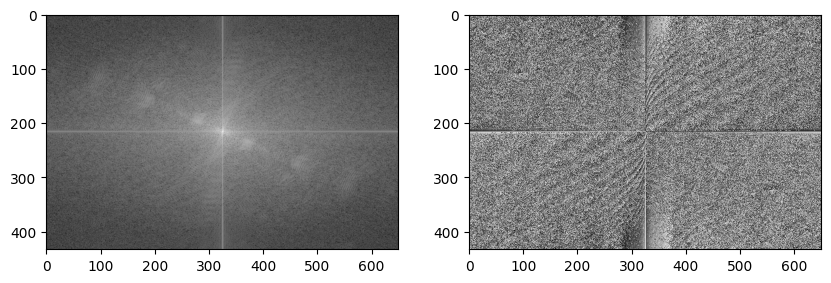

In [13]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(np.log(messi_amplitude+1e-10), cmap='gray')
plt.subplot(122)
plt.imshow(messi_phase, cmap='gray')

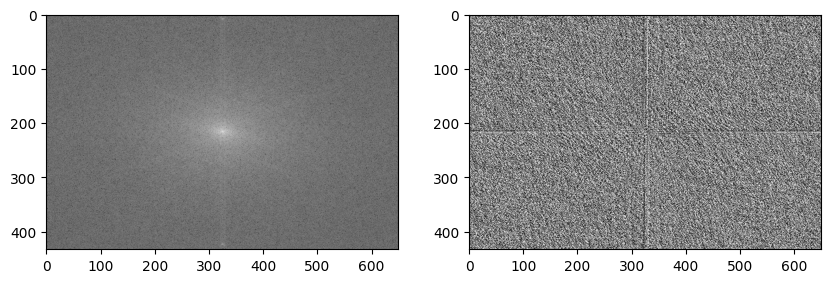

In [14]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(np.log(flower_amplitude+1e-10), cmap='gray')
plt.subplot(122)
plt.imshow(flower_phase, cmap='gray')

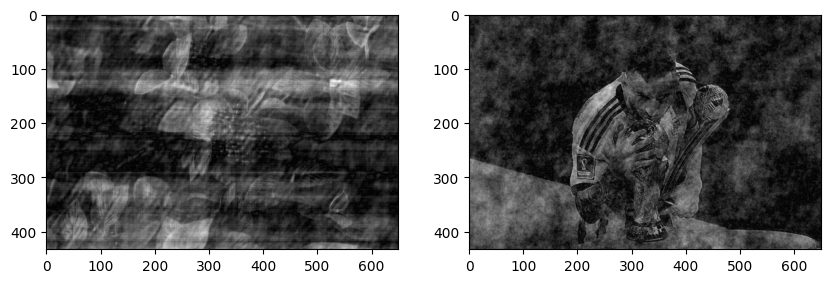

In [15]:
# amplitude_phase
messi_flower_comb = np.multiply(messi_amplitude, np.exp(1j * flower_phase))
messi_flower = np.real(np.fft.ifft2(np.fft.ifftshift(messi_flower_comb)))  # drop imagniary as they are around 1e-14

flower_messi_comb = np.multiply(flower_amplitude, np.exp(1j * messi_phase))
flower_messi = np.real(np.fft.ifft2(np.fft.ifftshift(flower_messi_comb )))  # drop imagniary as they are around 1e-14

# combined image has values < 0 and > 1, needs to be scaled.
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(np.abs(messi_flower), cmap='gray')
plt.subplot(122)
plt.imshow(np.abs(flower_messi), cmap='gray')



In [16]:
print (messi_amplitude)
print(messi_amplitude.shape)
x, y = messi_amplitude.shape
print(x)
print(y)

[[233.14662918 112.92085948 288.79121873 ... 175.02731939 222.30000027
   39.5992063 ]
 [218.12865602 171.66700588 198.22264782 ... 212.89351723  67.99755746
  390.83432352]
 [252.72842087 355.4016491  113.88891288 ... 133.12137679 189.61911907
  336.39338109]
 ...
 [252.72842087 336.39338109 189.61911907 ... 252.23731221 113.88891288
  355.4016491 ]
 [218.12865602 390.83432352  67.99755746 ... 174.64069182 198.22264782
  171.66700588]
 [233.14662918  39.5992063  222.30000027 ... 367.69365567 288.79121873
  112.92085948]]
(433, 650)
433
650


[[  1.           1.           1.         ... 175.02731939 222.30000027
   39.5992063 ]
 [  1.           1.           1.         ... 212.89351723  67.99755746
  390.83432352]
 [  1.           1.           1.         ... 133.12137679 189.61911907
  336.39338109]
 ...
 [252.72842087 336.39338109 189.61911907 ... 252.23731221 113.88891288
  355.4016491 ]
 [218.12865602 390.83432352  67.99755746 ... 174.64069182 198.22264782
  171.66700588]
 [233.14662918  39.5992063  222.30000027 ... 367.69365567 288.79121873
  112.92085948]]
[[ 0.          0.          0.         ... -0.06783095 -2.60044625
   0.53079234]
 [ 0.          0.          0.         ... -0.5030242  -3.10899841
  -1.2662732 ]
 [ 0.          0.          0.         ...  3.12898558 -1.42454779
   1.71943414]
 ...
 [ 1.26603231 -1.71943414  1.42454779 ... -2.60529828 -1.67213233
  -1.91988351]
 [ 2.86716114  1.2662732   3.10899841 ...  2.42910567 -0.31936554
   0.34142472]
 [-2.5232691  -0.53079234  2.60044625 ... -1.81550008  1.15933

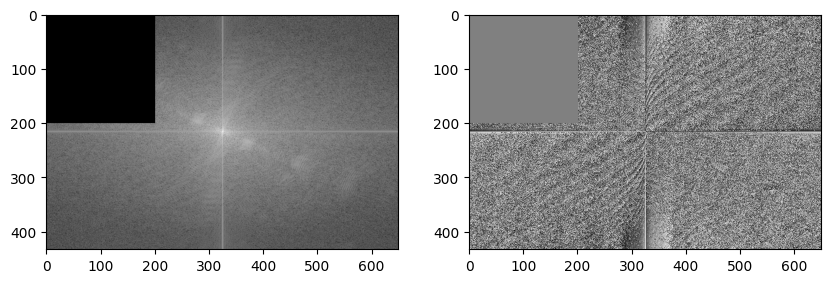

In [17]:
for x in range (0, messi_phase.shape[0]):
    for y in range ( 0,messi_phase.shape[1]):
        if (x>=0 and x<=200) and(y >=0 and y <=200):
                messi_amplitude[x][y] =   1


for x in range (0, messi_phase.shape[0]):
    for y in range ( 0,messi_phase.shape[1]):
        if (x>=0 and x<=200) and(y >=0 and y <=200):
                messi_phase[x][y] =   0

print(messi_amplitude)
print(messi_phase)
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(np.log(messi_amplitude), cmap='gray')
plt.subplot(122)
plt.imshow(messi_phase, cmap='gray')


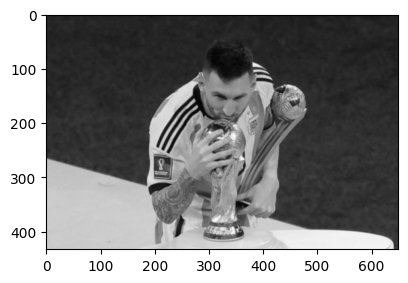

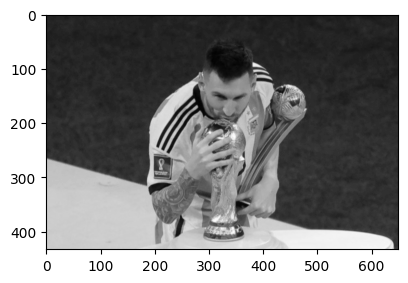

In [18]:
messi_flower_comb = np.multiply(messi_amplitude, np.exp(1j * messi_phase))
messi_flower = np.real(np.fft.ifft2(np.fft.ifftshift(messi_flower_comb)))  # drop imagniary as they are around 1e-14



# combined image has values < 0 and > 1, needs to be scaled.
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(messi_flower, cmap='gray')


plt.figure(figsize=(10, 15))
plt.subplot(122)
plt.imshow(messi, cmap='gray')
